In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_survey = pd.read_csv("/Users/vidhimittal/Desktop/Honors/user-survey-results-with-times.csv")

In [4]:
user_survey.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q26,Q27,QID48,Q28,QID52,Q29,Q30,Q31,Q41,QID50
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Copy and paste the exact line(s) from the prov...,Copy and paste the corrected line(s) of code.,As soon as you're done answering the above que...,Copy and paste the entire modified code file h...,As soon as you're done answering the above que...,How difficult did you find the debugging task?,How difficult did you find the feature additio...,How clearly were you able to understand the co...,How confident are you that your debugging and ...,To be filled by research team: Code Version
1,"{""ImportId"":""startDate"",""timeZone"":""America/Ne...","{""ImportId"":""endDate"",""timeZone"":""America/New_...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID38_TEXT""}","{""ImportId"":""QID40_TEXT""}","{""ImportId"":""QID48_TEXT""}","{""ImportId"":""QID42_TEXT""}","{""ImportId"":""QID52_TEXT""}","{""ImportId"":""QID43""}","{""ImportId"":""QID44""}","{""ImportId"":""QID45""}","{""ImportId"":""QID46""}","{""ImportId"":""QID50_TEXT""}"
2,2025-03-17 20:57:58,2025-03-17 21:34:46,IP Address,71.204.84.255,100,2207,TRUE,2025-03-17 21:34:46,R_72mGyBWDWCOiGDA,NaN,...,"books.put(title, false);",books.remove(title),3:51,import java.util.*;\n/**\n * A Library Managem...,10:00,Somewhat easy,Somewhat difficult,Extremely clear,Somewhat confident,Elaborated
3,2025-03-18 15:18:25,2025-03-18 15:45:01,IP Address,170.140.105.8,100,1596,TRUE,2025-03-18 15:45:02,R_3En4KzhtXBQuOSx,NaN,...,"m.b.put(t, false);",Unsure,5:00,import java.util.*;\n\npublic class MinimalLib...,10:00,Extremely difficult,Somewhat difficult,Somewhat unclear,Somewhat unsure,Minimal
4,2025-03-20 21:18:22,2025-03-20 22:01:22,IP Address,71.204.24.112,100,2580,TRUE,2025-03-20 22:01:23,R_3inG6n19HyLHY1U,NaN,...,public void removeBook(String title)\n {\n ...,public void removeBook(String title)\n {\n ...,5:03,import java.util.*;\n/**\n * A Library Managem...,9:28,Neither easy nor difficult,Somewhat difficult,Somewhat clear,Somewhat confident,Elaborated


In [5]:
user_scores = pd.read_csv("/Users/vidhimittal/Desktop/Honors/user-study-task-grades.csv")

In [6]:
user_survey_clean = user_survey.iloc[2:].copy()

user_survey_clean = user_survey_clean.rename(columns={
    'Q1_1': 'uniqueID',
    'QID50': 'code_version',
    'Q29': 'debug_difficulty',
    'Q30': 'addition_difficulty',
    'Q31': 'code_clarity',
    'Q41': 'confidence',
    'QID52': 'addition_time',
    'QID55': 'comprehension_time',
    'QID48': 'debugging_time',
    'Q2': 'major',
    'Q2_6_TEXT': 'other_major',
    'Q3': 'education',
    'Q3_7_TEXT': 'other_education',
    'Q4': 'java_experience_yes_or_no',
    'Q5': 'java_experience_level',
    'Q6': 'java_experience_years'
    
})

# Strip whitespace from code_version 
user_survey_clean['code_version'] = user_survey_clean['code_version'].str.strip()

# Reset index for cleanliness
user_survey_clean.reset_index(drop=True, inplace=True)
user_survey_clean.drop(columns=['StartDate', 'EndDate','Status','IPAddress','Progress','Duration (in seconds)', 'Finished','RecordedDate','ResponseId','RecipientLastName','RecipientFirstName','RecipientEmail','ExternalReference','LocationLatitude','LocationLongitude','DistributionChannel','UserLanguage'], axis=1, inplace=True)

In [7]:
user_survey_clean

,uniqueID,major,other_major,education,other_education,java_experience_yes_or_no,java_experience_level,java_experience_years,Q7,Q8,...,Q26,Q27,debugging_time,Q28,addition_time,debug_difficulty,addition_difficulty,code_clarity,confidence,code_version
0,1968Moon,"Business (Finance, Economics, etc.)",NaN,Fourth-Year Undergraduate,NaN,Yes,I have taken an introductory Java course (e.g....,Less than 1 year,2.5,HashMap,...,"books.put(title, false);",books.remove(title),3:51,import java.util.*;\n/**\n * A Library Managem...,10:00,Somewhat easy,Somewhat difficult,Extremely clear,Somewhat confident,Elaborated
1,1695Fire,Computer Science,NaN,Second-Year Undergraduate,NaN,Yes,I have used Java for academic coursework beyon...,1-2 years,2.0,HashMap,...,"m.b.put(t, false);",Unsure,5:00,import java.util.*;\n\npublic class MinimalLib...,10:00,Extremely difficult,Somewhat difficult,Somewhat unclear,Somewhat unsure,Minimal
2,7127Echo,Other,Biology (math minor),Fourth-Year Undergraduate,NaN,Yes,I have taken an introductory Java course (e.g....,Less than 1 year,2,Array,...,public void removeBook(String title)\n {\n ...,public void removeBook(String title)\n {\n ...,5:03,import java.util.*;\n/**\n * A Library Managem...,9:28,Neither easy nor difficult,Somewhat difficult,Somewhat clear,Somewhat confident,Elaborated
3,hyunsu0178,"Computer Science,Mathematics/ Statistics",NaN,First-Year Undergraduate,NaN,Yes,I have used Java for academic coursework beyon...,1-2 years,2.5,ArrayList,...,"m.b.put(t, false);",m.b.removeKey(t);,5:08,import java.util.*;\n\npublic class Library {\...,5:29,Somewhat easy,Somewhat easy,Neither clear nor unclear,Somewhat confident,Minimal
4,3255Moon,Computer Science,NaN,Fourth-Year Undergraduate,NaN,Yes,I have worked on personal or open-source Java ...,3-5 years,2.0,HashMap,...,"books.put(title, false);",books.remove(title);,1:38,import java.util.*;\n\n/**\n * A Library Manag...,5:28,Extremely easy,Somewhat easy,Somewhat clear,Very confident,Elaborated
5,5187Sky,"Computer Science,Business (Finance, Economics,...",NaN,First-Year Undergraduate,NaN,Yes,I have taken an introductory Java course (e.g....,Less than 1 year,2.5,Array,...,"books.put(title, false);\n","books.put(title, true);\n",5:06,import java.util.*;\n/**\n * A Library Managem...,9:35,Neither easy nor difficult,Neither easy nor difficult,Extremely clear,Neutral,Elaborated
6,8876Moon,Data Science,NaN,Second-Year Undergraduate,NaN,Yes,I have taken an introductory Java course (e.g....,1-2 years,2,ArrayList,...,lse if(c == 6){\n String t = sc...,else if(c == 6){\n String t = s...,3:12,import java.util.*;\n\npublic class Library {\...,4:18,Somewhat easy,Extremely difficult,Somewhat clear,Neutral,Minimal
7,9257Wave,Computer Science,NaN,First-Year Undergraduate,NaN,Yes,I have taken an introductory Java course (e.g....,Less than 1 year,2,ArrayList,...,"line 47: m.b.put(t, false);",m.b.remove(t);\n,5:15,import java.util.*;\n\npublic class Library {\...,5:32,Somewhat easy,Somewhat easy,Somewhat clear,Very confident,Minimal
8,5517Echo,Computer Science,NaN,First-Year Undergraduate,NaN,Yes,I have taken an introductory Java course (e.g....,1-2 years,2.0,HashMap,...,"m.b.put(t, false);","m.b.remove(t, false);",2:18,import java.util.*;\n\npublic class Library {\...,6:10,Extremely easy,Extremely easy,Somewhat clear,Somewhat confident,Minimal
9,0741Wind,Computer Science,NaN,Second-Year Undergraduate,NaN,Yes,I have taken an introductory Java course (e.g....,Less than 1 year,2.0,HashMap,...,"m.b.put(t, false);",m.b.remove(t);,4:47,import java.util.*;\n\npublic class Library {\...,7:28,Somewhat easy,Somewhat easy,Somewhat clear,Neutral,Minimal


In [8]:
df_merged = pd.merge(user_scores, user_survey_clean, on="uniqueID", how="inner")

df_merged["code_binary"] = df_merged["code_version"].map({"Minimal": 0, "Elaborated": 1})

In [9]:
df_merged.head()

,uniqueID,debugging_score,addition_score,java_prequiz,comprehension_task,major,other_major,education,other_education,java_experience_yes_or_no,...,Q27,debugging_time,Q28,addition_time,debug_difficulty,addition_difficulty,code_clarity,confidence,code_version,code_binary
0,1968Moon,10,9,4,9,"Business (Finance, Economics, etc.)",NaN,Fourth-Year Undergraduate,NaN,Yes,...,books.remove(title),3:51,import java.util.*;\n/**\n * A Library Managem...,10:00,Somewhat easy,Somewhat difficult,Extremely clear,Somewhat confident,Elaborated,1
1,1695Fire,5,3,5,4,Computer Science,NaN,Second-Year Undergraduate,NaN,Yes,...,Unsure,5:00,import java.util.*;\n\npublic class MinimalLib...,10:00,Extremely difficult,Somewhat difficult,Somewhat unclear,Somewhat unsure,Minimal,0
2,7127Echo,9,8,2,9,Other,Biology (math minor),Fourth-Year Undergraduate,NaN,Yes,...,public void removeBook(String title)\n {\n ...,5:03,import java.util.*;\n/**\n * A Library Managem...,9:28,Neither easy nor difficult,Somewhat difficult,Somewhat clear,Somewhat confident,Elaborated,1
3,hyunsu0178,7,10,3,8,"Computer Science,Mathematics/ Statistics",NaN,First-Year Undergraduate,NaN,Yes,...,m.b.removeKey(t);,5:08,import java.util.*;\n\npublic class Library {\...,5:29,Somewhat easy,Somewhat easy,Neither clear nor unclear,Somewhat confident,Minimal,0
4,3255Moon,10,10,5,9,Computer Science,NaN,Fourth-Year Undergraduate,NaN,Yes,...,books.remove(title);,1:38,import java.util.*;\n\n/**\n * A Library Manag...,5:28,Extremely easy,Somewhat easy,Somewhat clear,Very confident,Elaborated,1


In [10]:
print(df_merged.columns)

Index(['uniqueID', 'debugging_score', 'addition_score', 'java_prequiz',
       'comprehension_task', 'major', 'other_major', 'education',
       'other_education', 'java_experience_yes_or_no', 'java_experience_level',
       'java_experience_years', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'comprehension_time', 'Q25', 'Q26', 'Q27', 'debugging_time', 'Q28',
       'addition_time', 'debug_difficulty', 'addition_difficulty',
       'code_clarity', 'confidence', 'code_version', 'code_binary'],
      dtype='object')


In [11]:
difficulty_map = {
    "Extremely difficult": 1,
    "Somewhat difficult": 2,
    "Neither easy nor difficult": 3,
    "Somewhat easy": 4,
    "Extremely easy": 5
}

clarity_map = {
    "Extremely unclear": 1,
    "Somewhat unclear": 2,
    "Neither clear nor unclear": 3,
    "Somewhat clear": 4,
    "Extremely clear": 5
}

confidence_map = {
    "Very unsure": 1,
    "Somewhat unsure": 2,
    "Neutral": 3,
    "Somewhat confident": 4,
    "Very confident": 5
}

df_merged["debug_difficulty_num"] = df_merged["debug_difficulty"].map(difficulty_map)
df_merged["addition_difficulty_num"] = df_merged["addition_difficulty"].map(difficulty_map)
df_merged["code_clarity_num"] = df_merged["code_clarity"].map(clarity_map)
df_merged["confidence_num"] = df_merged["confidence"].map(confidence_map)

In [12]:
df_merged

,uniqueID,debugging_score,addition_score,java_prequiz,comprehension_task,major,other_major,education,other_education,java_experience_yes_or_no,...,debug_difficulty,addition_difficulty,code_clarity,confidence,code_version,code_binary,debug_difficulty_num,addition_difficulty_num,code_clarity_num,confidence_num
0,1968Moon,10,9,4,9,"Business (Finance, Economics, etc.)",NaN,Fourth-Year Undergraduate,NaN,Yes,...,Somewhat easy,Somewhat difficult,Extremely clear,Somewhat confident,Elaborated,1,4,2,5,4
1,1695Fire,5,3,5,4,Computer Science,NaN,Second-Year Undergraduate,NaN,Yes,...,Extremely difficult,Somewhat difficult,Somewhat unclear,Somewhat unsure,Minimal,0,1,2,2,2
2,7127Echo,9,8,2,9,Other,Biology (math minor),Fourth-Year Undergraduate,NaN,Yes,...,Neither easy nor difficult,Somewhat difficult,Somewhat clear,Somewhat confident,Elaborated,1,3,2,4,4
3,hyunsu0178,7,10,3,8,"Computer Science,Mathematics/ Statistics",NaN,First-Year Undergraduate,NaN,Yes,...,Somewhat easy,Somewhat easy,Neither clear nor unclear,Somewhat confident,Minimal,0,4,4,3,4
4,3255Moon,10,10,5,9,Computer Science,NaN,Fourth-Year Undergraduate,NaN,Yes,...,Extremely easy,Somewhat easy,Somewhat clear,Very confident,Elaborated,1,5,4,4,5
5,5187Sky,4,4,4,9,"Computer Science,Business (Finance, Economics,...",NaN,First-Year Undergraduate,NaN,Yes,...,Neither easy nor difficult,Neither easy nor difficult,Extremely clear,Neutral,Elaborated,1,3,3,5,3
6,8876Moon,1,2,3,7,Data Science,NaN,Second-Year Undergraduate,NaN,Yes,...,Somewhat easy,Extremely difficult,Somewhat clear,Neutral,Minimal,0,4,1,4,3
7,9257Wave,7,10,2,9,Computer Science,NaN,First-Year Undergraduate,NaN,Yes,...,Somewhat easy,Somewhat easy,Somewhat clear,Very confident,Minimal,0,4,4,4,5
8,5517Echo,10,8,5,9,Computer Science,NaN,First-Year Undergraduate,NaN,Yes,...,Extremely easy,Extremely easy,Somewhat clear,Somewhat confident,Minimal,0,5,5,4,4
9,0741Wind,10,10,5,9,Computer Science,NaN,Second-Year Undergraduate,NaN,Yes,...,Somewhat easy,Somewhat easy,Somewhat clear,Neutral,Minimal,0,4,4,4,3


In [13]:
print("Sample sizes:")
print(df_merged["code_version"].value_counts())
print("\n")


print("Education levels:")
print(df_merged["education"].value_counts())
print("\n")

print("Java experience (yes/no):")
print(df_merged["java_experience_yes_or_no"].value_counts())

Sample sizes:
Minimal       8
Elaborated    7
Name: code_version, dtype: int64


Education levels:
Fourth-Year Undergraduate      6
First-Year Undergraduate       5
Second-Year Undergraduate      3
Graduate Student (Master's)    1
Name: education, dtype: int64


Java experience (yes/no):
Yes    15
Name: java_experience_yes_or_no, dtype: int64


In [14]:
score_columns = ["debugging_score", "addition_score", "comprehension_task"]

group_stats = df_merged.groupby("code_version")[score_columns].agg(["mean", "std", "min", "max", "count"])
group_stats

debugging_score                         addition_score            \
                        mean       std min max count           mean       std   
code_version                                                                    
Elaborated             9.000  2.236068   4  10     7       8.714286  2.214670   
Minimal                6.125  3.870677   0  10     8       7.000000  3.664502   

                           comprehension_task                          
             min max count               mean       std min max count  
code_version                                                           
Elaborated     4  10     7               9.00  0.000000   9   9     7  
Minimal        2  10     8               7.75  1.669046   4   9     8

In [15]:
likert_columns = [
    "debug_difficulty_num", 
    "addition_difficulty_num", 
    "code_clarity_num", 
    "confidence_num"
]

likert_stats = df_merged.groupby("code_version")[likert_columns].agg(["mean", "std", "count"])
likert_stats

debug_difficulty_num                 addition_difficulty_num  \
                             mean       std count                    mean   
code_version                                                                
Elaborated               4.142857  0.899735     7                3.428571   
Minimal                  3.375000  1.302470     8                3.125000   

                             code_clarity_num                 confidence_num  \
                   std count             mean       std count           mean   
code_version                                                                   
Elaborated    1.133893     7         4.571429  0.534522     7       3.857143   
Minimal       1.356203     8         3.500000  0.755929     8       3.125000   

                              
                   std count  
code_version                  
Elaborated    1.069045     7  
Minimal       1.125992     8

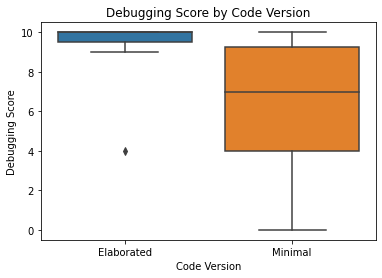

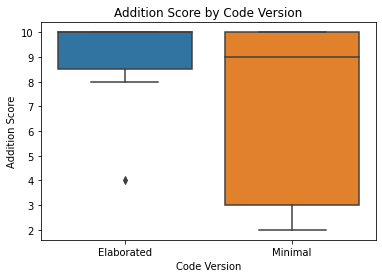

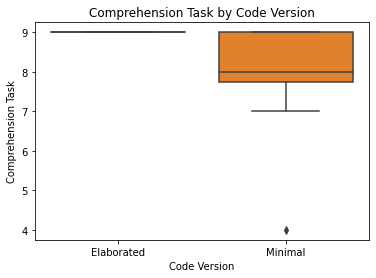

In [17]:
for score in score_columns:
    plt.figure()
    sns.boxplot(data=df_merged, x="code_version", y=score)
    plt.title(f"{score.replace('_', ' ').title()} by Code Version")
    plt.xlabel("Code Version")
    plt.ylabel(score.replace("_", " ").title())
    plt.show()

In [18]:
df_merged.groupby("code_version")[["debugging_score", "addition_score", "comprehension_task"]].agg(['mean', 'std', 'median', 'min', 'max', 'count', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]).rename(columns={
    "<lambda_0>": "Q1",
    "<lambda_1>": "Q3"
})

debugging_score                                             \
                        mean       std median min max count   Q1     Q3   
code_version                                                              
Elaborated             9.000  2.236068   10.0   4  10     7  9.5  10.00   
Minimal                6.125  3.870677    7.0   0  10     8  4.0   9.25   

             addition_score            ...            comprehension_task  \
                       mean       std  ...   Q1    Q3               mean   
code_version                           ...                                 
Elaborated         8.714286  2.214670  ...  8.5  10.0               9.00   
Minimal            7.000000  3.664502  ...  3.0  10.0               7.75   

                                                        
                   std median min max count    Q1   Q3  
code_version                                            
Elaborated    0.000000    9.0   9   9     7  9.00  9.0  
Minimal       1.669046    8.0   4   9     8  7.75  9.0  

[2 rows x 24 columns]

In [19]:
likerts = ["debug_difficulty", "addition_difficulty", "code_clarity", "confidence"]

for var in likerts:
    print(f"\n{var} - Full Response Counts:")
    print(df_merged.groupby("code_version")[var].value_counts(dropna=False))


debug_difficulty - Full Response Counts:
code_version  debug_difficulty          
Elaborated    Extremely easy                3
              Neither easy nor difficult    2
              Somewhat easy                 2
Minimal       Somewhat easy                 4
              Extremely difficult           1
              Extremely easy                1
              Neither easy nor difficult    1
              Somewhat difficult            1
Name: debug_difficulty, dtype: int64

addition_difficulty - Full Response Counts:
code_version  addition_difficulty       
Elaborated    Somewhat easy                 3
              Somewhat difficult            2
              Extremely easy                1
              Neither easy nor difficult    1
Minimal       Somewhat easy                 3
              Somewhat difficult            2
              Extremely difficult           1
              Extremely easy                1
              Neither easy nor difficult    1
Name: additi

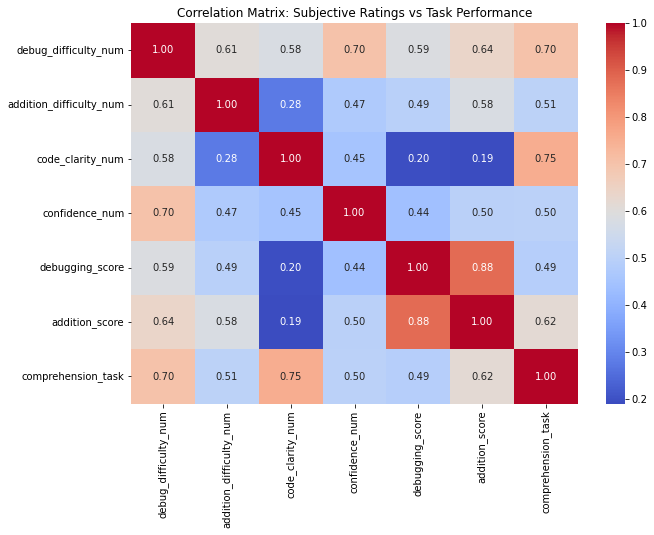

In [20]:
likert_numeric = [
    "debug_difficulty_num",
    "addition_difficulty_num",
    "code_clarity_num",
    "confidence_num",
]

score_columns = [
    "debugging_score",
    "addition_score",
    "comprehension_task"
]

correlation_matrix = df_merged[likert_numeric + score_columns].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Subjective Ratings vs Task Performance")
plt.show()

In [21]:
from scipy.stats import ttest_ind

# Split by group
min_group = df_merged[df_merged["code_version"] == "Minimal"]
elab_group = df_merged[df_merged["code_version"] == "Elaborated"]

# Run t-tests
print("Debugging Score T-test:", ttest_ind(min_group["debugging_score"], elab_group["debugging_score"], equal_var=False))
print("Addition Score T-test:", ttest_ind(min_group["addition_score"], elab_group["addition_score"], equal_var=False))
print("Comprehension Score T-test:", ttest_ind(min_group["comprehension_task"], elab_group["comprehension_task"], equal_var=False))

Debugging Score T-test: TtestResult(statistic=-1.7874550864108871, pvalue=0.10040532119610157, df=11.419854074407235)
Addition Score T-test: TtestResult(statistic=-1.1113811124571615, pvalue=0.2887438425941363, df=11.687736004920652)
Comprehension Score T-test: TtestResult(statistic=-2.1182963643408086, pvalue=0.07190215419662098, df=7.0)


/Users/vidhimittal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
def cohens_d(x1, x2):
    pooled_std = np.sqrt(((len(x1) - 1) * np.std(x1, ddof=1) ** 2 + (len(x2) - 1) * np.std(x2, ddof=1) ** 2) / (len(x1) + len(x2) - 2))
    return (np.mean(x2) - np.mean(x1)) / pooled_std

print("Cohen's d (Debugging):", cohens_d(min_group["debugging_score"], elab_group["debugging_score"]))
print("Cohen's d (Addition):", cohens_d(min_group["addition_score"], elab_group["addition_score"]))
print("Cohen's d (Comprehension):", cohens_d(min_group["comprehension_task"], elab_group["comprehension_task"]))

Cohen's d (Debugging): 0.8925731045622828
Cohen's d (Addition): 0.5563486402641864
Cohen's d (Comprehension): 1.0206207261596576


In [23]:
from scipy.stats import mannwhitneyu

print("Mann-Whitney U (Debugging):", mannwhitneyu(min_group["debugging_score"], elab_group["debugging_score"], alternative='two-sided'))
print("Mann-Whitney U (Addition):", mannwhitneyu(min_group["addition_score"], elab_group["addition_score"], alternative='two-sided'))
print("Mann-Whitney U (Comprehension):", mannwhitneyu(min_group["comprehension_task"], elab_group["comprehension_task"], alternative='two-sided'))

Mann-Whitney U (Debugging): MannwhitneyuResult(statistic=13.5, pvalue=0.08703980897221959)
Mann-Whitney U (Addition): MannwhitneyuResult(statistic=21.5, pvalue=0.4504098571167392)
Mann-Whitney U (Comprehension): MannwhitneyuResult(statistic=10.5, pvalue=0.018549678494855493)


In [24]:
import statsmodels.formula.api as smf

# Regressions with java_prequiz as covariate
model_debug = smf.ols("debugging_score ~ code_binary + java_prequiz", data=df_merged).fit()
model_addition = smf.ols("addition_score ~ code_binary + java_prequiz", data=df_merged).fit()
model_comprehension = smf.ols("comprehension_task ~ code_binary + java_prequiz", data=df_merged).fit()

print(model_debug.summary())
print(model_addition.summary())
print(model_comprehension.summary())

                            OLS Regression Results                            
Dep. Variable:        debugging_score   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     2.596
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.116
Time:                        19:16:29   Log-Likelihood:                -36.605
No. Observations:                  15   AIC:                             79.21
Df Residuals:                      12   BIC:                             81.33
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9516      3.154      0.619   

/Users/vidhimittal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)
/Users/vidhimittal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)
/Users/vidhimittal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [25]:
def time_to_minutes(t):
    try:
        if isinstance(t, str) and ':' in t:
            minutes, seconds = t.strip().split(":")
            return int(minutes) + int(seconds) / 60
        return None
    except:
        return None

In [26]:
df_merged["debugging_minutes"] = df_merged["debugging_time"].apply(time_to_minutes)

In [27]:
df_merged

,uniqueID,debugging_score,addition_score,java_prequiz,comprehension_task,major,other_major,education,other_education,java_experience_yes_or_no,...,addition_difficulty,code_clarity,confidence,code_version,code_binary,debug_difficulty_num,addition_difficulty_num,code_clarity_num,confidence_num,debugging_minutes
0,1968Moon,10,9,4,9,"Business (Finance, Economics, etc.)",NaN,Fourth-Year Undergraduate,NaN,Yes,...,Somewhat difficult,Extremely clear,Somewhat confident,Elaborated,1,4,2,5,4,3.850000
1,1695Fire,5,3,5,4,Computer Science,NaN,Second-Year Undergraduate,NaN,Yes,...,Somewhat difficult,Somewhat unclear,Somewhat unsure,Minimal,0,1,2,2,2,5.000000
2,7127Echo,9,8,2,9,Other,Biology (math minor),Fourth-Year Undergraduate,NaN,Yes,...,Somewhat difficult,Somewhat clear,Somewhat confident,Elaborated,1,3,2,4,4,5.050000
3,hyunsu0178,7,10,3,8,"Computer Science,Mathematics/ Statistics",NaN,First-Year Undergraduate,NaN,Yes,...,Somewhat easy,Neither clear nor unclear,Somewhat confident,Minimal,0,4,4,3,4,5.133333
4,3255Moon,10,10,5,9,Computer Science,NaN,Fourth-Year Undergraduate,NaN,Yes,...,Somewhat easy,Somewhat clear,Very confident,Elaborated,1,5,4,4,5,1.633333
5,5187Sky,4,4,4,9,"Computer Science,Business (Finance, Economics,...",NaN,First-Year Undergraduate,NaN,Yes,...,Neither easy nor difficult,Extremely clear,Neutral,Elaborated,1,3,3,5,3,5.100000
6,8876Moon,1,2,3,7,Data Science,NaN,Second-Year Undergraduate,NaN,Yes,...,Extremely difficult,Somewhat clear,Neutral,Minimal,0,4,1,4,3,3.200000
7,9257Wave,7,10,2,9,Computer Science,NaN,First-Year Undergraduate,NaN,Yes,...,Somewhat easy,Somewhat clear,Very confident,Minimal,0,4,4,4,5,5.250000
8,5517Echo,10,8,5,9,Computer Science,NaN,First-Year Undergraduate,NaN,Yes,...,Extremely easy,Somewhat clear,Somewhat confident,Minimal,0,5,5,4,4,2.300000
9,0741Wind,10,10,5,9,Computer Science,NaN,Second-Year Undergraduate,NaN,Yes,...,Somewhat easy,Somewhat clear,Neutral,Minimal,0,4,4,4,3,4.783333


In [28]:
df_merged["addition_minutes"] = df_merged["addition_time"].apply(time_to_minutes)
df_merged["comprehension_minutes"] = df_merged["comprehension_time"].apply(time_to_minutes)

In [29]:
df_merged.loc[df_merged["uniqueID"] == "1695Fire", "comprehension_minutes"] = 5.0
df_merged.loc[df_merged["uniqueID"] == "3255Moon", "comprehension_minutes"] = 1.5

In [30]:
df_merged["debugging_efficiency"] = df_merged["debugging_score"] / df_merged["debugging_minutes"]
df_merged["addition_efficiency"] = df_merged["addition_score"] / df_merged["addition_minutes"]
df_merged["comprehension_efficiency"] = df_merged["comprehension_task"] / df_merged["comprehension_minutes"]

In [31]:
df_merged[["debugging_minutes", "addition_minutes", "comprehension_minutes"]].describe()

,debugging_minutes,addition_minutes,comprehension_minutes
count,15.000000,15.000000,15.000000
mean,3.824444,7.027778,3.845556
std,1.558895,2.238167,1.267864
min,0.883333,2.616667,1.500000
25%,2.750000,5.508333,3.491667
50%,4.783333,6.700000,3.916667
75%,5.075000,9.100000,4.533333
max,5.500000,10.000000,6.666667


In [32]:
df_merged[df_merged["debugging_minutes"].isna() |
          df_merged["addition_minutes"].isna() |
          df_merged["comprehension_minutes"].isna()]

,uniqueID,debugging_score,addition_score,java_prequiz,comprehension_task,major,other_major,education,other_education,java_experience_yes_or_no,...,debug_difficulty_num,addition_difficulty_num,code_clarity_num,confidence_num,debugging_minutes,addition_minutes,comprehension_minutes,debugging_efficiency,addition_efficiency,comprehension_efficiency


In [33]:
df_merged.groupby("code_version")[["debugging_score", "debugging_minutes", "debugging_efficiency"]].agg(["mean", "std"])

debugging_score           debugging_minutes            \
                        mean       std              mean       std   
code_version                                                         
Elaborated             9.000  2.236068          3.059524  1.704837   
Minimal                6.125  3.870677          4.493750  1.127821   

             debugging_efficiency            
                             mean       std  
code_version                                 
Elaborated               4.522357  3.604974  
Minimal                  1.510531  1.332728

In [34]:
from scipy.stats import ttest_ind

debug_min_eff = df_merged[df_merged["code_version"] == "Minimal"]["debugging_efficiency"]
debug_elab_eff = df_merged[df_merged["code_version"] == "Elaborated"]["debugging_efficiency"]

ttest_ind(debug_min_eff, debug_elab_eff, equal_var=False)

TtestResult(statistic=-2.0890443606378493, pvalue=0.07278090028848572, df=7.429785383623307)

In [35]:
import statsmodels.formula.api as smf

debug_model = smf.ols("debugging_score ~ code_binary + java_prequiz + debugging_minutes", data=df_merged).fit()
print(debug_model.summary())

                            OLS Regression Results                            
Dep. Variable:        debugging_score   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     1.595
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.247
Time:                        19:32:42   Log-Likelihood:                -36.592
No. Observations:                  15   AIC:                             81.18
Df Residuals:                      11   BIC:                             84.02
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6338      6.04

/Users/vidhimittal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
comp_min_eff = df_merged[df_merged["code_version"] == "Minimal"]["comprehension_efficiency"]
comp_elab_eff = df_merged[df_merged["code_version"] == "Elaborated"]["comprehension_efficiency"]

ttest_ind(comp_min_eff, comp_elab_eff, equal_var=False)

TtestResult(statistic=-1.641184800764587, pvalue=0.14368627550441074, df=7.180446741761774)

In [37]:
comp_model = smf.ols("comprehension_task ~ code_binary + java_prequiz + comprehension_minutes", data=df_merged).fit()
print(comp_model.summary())

                            OLS Regression Results                            
Dep. Variable:     comprehension_task   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.192
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.147
Time:                        19:32:55   Log-Likelihood:                -21.700
No. Observations:                  15   AIC:                             51.40
Df Residuals:                      11   BIC:                             54.23
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.11

/Users/vidhimittal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [38]:
add_min_eff = df_merged[df_merged["code_version"] == "Minimal"]["addition_efficiency"]
add_elab_eff = df_merged[df_merged["code_version"] == "Elaborated"]["addition_efficiency"]

ttest_ind(add_min_eff, add_elab_eff, equal_var=False)

TtestResult(statistic=-1.031516692074397, pvalue=0.3287037230991419, df=9.181613794971408)

In [39]:
add_model = smf.ols("addition_score ~ code_binary + java_prequiz + addition_minutes", data=df_merged).fit()
print(add_model.summary())

                            OLS Regression Results                            
Dep. Variable:         addition_score   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.9351
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.456
Time:                        19:33:06   Log-Likelihood:                -36.026
No. Observations:                  15   AIC:                             80.05
Df Residuals:                      11   BIC:                             82.88
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.6247      4.273  

/Users/vidhimittal/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [40]:
from scipy.stats import ttest_ind


likert_columns = [
    "debug_difficulty_num", 
    "addition_difficulty_num", 
    "code_clarity_num", 
    "confidence_num"
]


minimal = df_merged[df_merged["code_version"] == "Minimal"]
elaborated = df_merged[df_merged["code_version"] == "Elaborated"]


for col in likert_columns:
    t_stat, p_val = ttest_ind(minimal[col], elaborated[col], equal_var=False)  # Welch's t-test
    print(f"{col}:\nt({len(df_merged)-2}) = {t_stat:.2f}, p = {p_val:.4f}\n")

debug_difficulty_num:
t(13) = -1.34, p = 0.2038

addition_difficulty_num:
t(13) = -0.47, p = 0.6447

code_clarity_num:
t(13) = -3.20, p = 0.0073

confidence_num:
t(13) = -1.29, p = 0.2195

